# 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

- 비용함수는 학습 데이터의 잔차 오류값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균현을 이뤄야 한다.
- 비용 함수 목표 = Min(RSS(W) + alpha * ||W||22)
    - alpha값을 크게하면 비용함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있고,
    - alpha값을 작게하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.
    - 즉, alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있다.
    - 이처럼 비용함수에 alpha값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)라고 부른다.
    - 규제는 크게 L2방식과 L1방식으로 구분된다.
- L2규제는 W의 제곱에 대해 페널티를 부여하는 방식이다.
    - L2규제를 적용한 회귀를 릿지(Ridge)회귀라고 한다.
- L1규제 W의 절대값에 대해 페널티를 부여하는 방식이다.
    - L1규제를 적용한 회귀를 라쏘(Lasso)회귀라고 한다.

## 릿지 회귀
- 보스턴 주택가격 ridge회귀로 다시 예측해보고 예측 성능을 cross_val_score로 평가

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target # boston데이터셋의 target 배열은 주택가격
df = bostonDF

In [11]:
# feature, target 데이터 분리
y_target = df['PRICE'] # 레이블(종속변수)
X_data = df.drop(['PRICE'], axis=1, inplace=False) # 피처(독립변수)

In [19]:
X_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 flods 의 개별 Negative MSE scores:', np.round(neg_mse_scores,3))
print('5 flods 의 개별 RMSE scores:', np.round(rmse_scores,3))
print('5 flods 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 flods 의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 flods 의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 flods 의 평균 RMSE: 5.518


- 릿지의 5개 폴드 세트의 평균 RMSE가 5.518 인것을 확인했다.
- 앞 예제의 규제가 없는 LinearRegression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능을 보여준다.

### 릿지의 alpha값을 0, 0.1, 1, 10, 100으로 변환시키면서 RMSE와 회귀 계수 값의 변화 확인하기

In [13]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균rmse 구하기
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score를 이용해 5폴드의 평균 rmse를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    
    print('alpha {0}일때 5 folds의 평균 RMSE : {1:.3f}' .format(alpha, avg_rmse))

alpha 0일때 5 folds의 평균 RMSE : 5.829
alpha 0.1일때 5 folds의 평균 RMSE : 5.788
alpha 1일때 5 folds의 평균 RMSE : 5.653
alpha 10일때 5 folds의 평균 RMSE : 5.518
alpha 100일때 5 folds의 평균 RMSE : 5.330


- alpha가 100일때 평균 RMSE가 5.330으로 가장 좋다. 

### alpha값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화

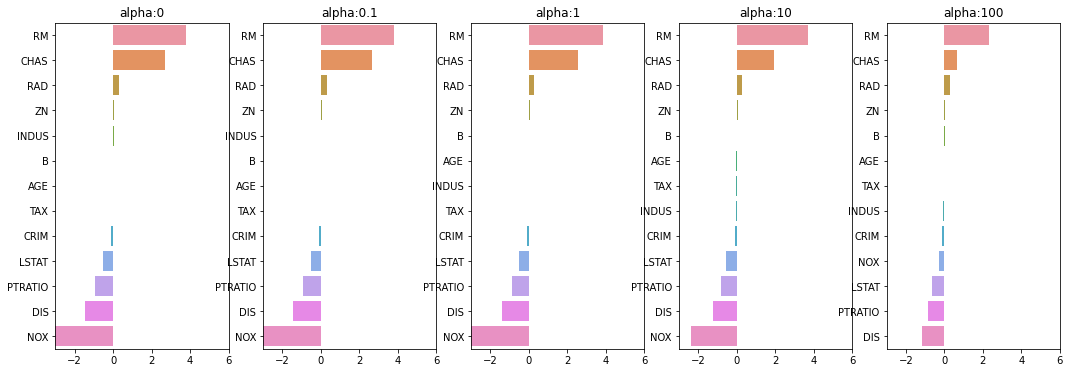

In [17]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrmae생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for문 밖에서 맷플롯립의 show호출 및 alpha에 따른 피처별 회귀 계수를 DataFrmae으로 표시
plt.show()

In [20]:
print(coeff)

RM         2.334536
CHAS       0.638335
RAD        0.315358
ZN         0.054496
B          0.009393
AGE        0.001212
TAX       -0.015856
INDUS     -0.052826
CRIM      -0.102202
NOX       -0.262847
LSTAT     -0.660764
PTRATIO   -0.829218
DIS       -1.153390
dtype: float64
